### Thomas Algorithm : Special Case of Naive Gauss to Solve Tridiagonal System of linear equations

$a_{m}x_{m-1} + b_{m}x_{m} + c_{m}x_{m+1} = d_{m}\qquad m = 0,1,\ldots,M,$

$a_{0} = 0,\quad c_{M} = 0$

$$
\begin{bmatrix} 
b_{0} & c_{1} & & & 0 \\
a_{1} & b_{1} & c_{2}&&\\
 & a_{2} & b_{2}& \ddots&  \\
 &  &  \ddots &\ddots& c_{M}\\
0 &  && a_{M}&b_{M}
\end{bmatrix} \begin{bmatrix} 
x_{0}  \\
x_{1}\\
x_{2} \\
\vdots\\
x_{M}
\end{bmatrix} = \begin{bmatrix} 
d_{0}  \\
d_{1} \\
d_{2} \\
\vdots\\
d_{M}
\end{bmatrix}
$$
###   Elimination:
$$\tilde{c}_{m} = \begin{cases}
\frac{c_{m}}{b_{m}}& {:}\; m = 0\\
 \frac{c_{m}}{b_{m} - a_{m}\tilde{c}_{m-1}}& {:}\; m = 1,2,\ldots,M-1
\end{cases}$$

$$\tilde{d}_{m} = \begin{cases}
\frac{d_{m}}{b_{m}}& {:}\; m = 0\\[5pt]
 \frac{d_{m} - a_{m}\tilde{d}_{m-1}}{b_{m} - a_{m}\tilde{c}_{m-1}}& {:}\; m = 1,2,\ldots,M
\end{cases}$$

###   Back-substitution:

$$x_{m} = \begin{cases}
\tilde{d}_{m} & {:}\; m = M\\[5pt]
\tilde{d}_{m} - \tilde{c}_{m}x_{m+1}& {:}\; m = M-1,M-2,\ldots,1,0
\end{cases}$$


In [18]:
def ThomasMethod(a,b,c,d):
    x = zeros((len(d),1))
    M = len(x)-1

    # Elimination 

    # Modify the first-row coefficients
    c[0] = c[0] / b[0]    # Division by zero risk.
    d[0] = d[0] / b[0]   
 
    for m in range(1,M):
        temp = b[m] - a[m] * c[m-1]
        c[m] = c[m] / temp
        d[m] = (d[m] - a[m] * d[m-1]) / temp

    d[M] = (d[M] - a[M] * d[M-1]) / ( b[M] - a[M] * c[M-1])
 
    # Back-substitution
    x[M] = d[M]
    for m in range(M-1,-1,-1):
        x[m] = d[m] - c[m]*x[m+1]
    
    return x

### An Example 

### Problem  1

#### Given Boundry Value Problem
\begin{align*}
&-\frac{\partial^2 u}{\partial x^2} + u = 2\sin{x}\quad \forall x \in (0, \pi)\\
& \quad\quad u(0)= 0 = u(\pi)\\
\end{align*}

Given uniform partition 

$$\left\{x_{j}\in [0,\pi]: j =0,1,\ldots,M+1\right\}$$ $$x_{j}=j\delta x,\quad \delta x = \pi /(M+1)$$ 

of the interval $[0,\pi]$ and let $U_{j}$ denotes the approximation of $u$ at point $x_{j}$, that is, $U_{j}\approx u(x_{j})$.

Given Finite Difference Approximation 

\begin{align*}
&\frac{-U_{j-1} + 2U_{j} - U_{j+1}}{{\delta x}^2} + U_{j} = 2\sin(x_{j})
\end{align*}

### Solution

## Part - 1 : Naive Gauss Elimination 

In given problem system to be solved is tridiagonal system so we will solve this system using thomas algorithm which uses the naive gauss elimination

### Step-I: Import required modules

In [19]:
from numpy import zeros, linspace, dot, sin, pi, identity, linalg
import time
import matplotlib.pyplot as plt
from matplotlib import animation, rc ## Needed for animation

### Step-II : Partitioning the domain  $[0,\pi]$

In [20]:
def unipart(M):  #uniform partition
    x = linspace(0,pi,M+2)  #points in plane
    dx = (pi-0)/(M+1)  # dx := 𝛿𝑥
    return x,dx

### Step-III: Define  the exact solution

In [21]:
def uexact(x):
    return sin(x)  

### Step-IV: Thomas-Algorithm for solving a tridiagonal system of linear equations

#### This is the tridiagonal system we are going to solve as per question

$$
\begin{bmatrix} 
b & a & & & 0 \\
a & b & a&&\\
 & a &b & \ddots&  \\
 &  &  \ddots &\ddots& a\\
0 &  && a&b
\end{bmatrix} \begin{bmatrix} 
U_{1}  \\
U_{2}\\
U_{3} \\
\vdots\\
U_{M}
\end{bmatrix} = \begin{bmatrix} 
c_{1}  \\
c_{2} \\
c_{3} \\
\vdots\\
c_{M}
\end{bmatrix}
$$

$$
a = -1 \quad
b = (2+{\delta x}^2) \quad
c_{j} = (2{\delta x}^2)sin(x_{j}) \quad j = 1,2, ... , M
$$

In [22]:
def ThomasMethod(a,b,c,d):
    x = zeros((len(d),1))
    M = len(x)-1

    # Elimination 

    # Modify the first-row coefficients
    c[0] = c[0] / b[0]    # Division by zero risk.
    d[0] = d[0] / b[0]   
 
    for m in range(1,M):
        temp = b[m] - a[m] * c[m-1]
        c[m] = c[m] / temp
        d[m] = (d[m] - a[m] * d[m-1]) / temp

    d[M] = (d[M] - a[M] * d[M-1]) / ( b[M] - a[M] * c[M-1])
 
    # Back-substitution
    x[M] = d[M]
    for m in range(M-1,-1,-1): 
        x[m] = d[m] - c[m]*x[m+1]
    
    return x

### Step-V: Implement BE-CD-FDM

In [23]:
def Solve(M):
    #Get the partition
    x,dx = unipart(M)

    # Solve the system using Thomas Algorithm
    subdiag = zeros((len(x),1)) 
    diag = zeros((len(x),1))
    supdiag = zeros((len(x),1))
    RHS = zeros(((len(x)),1)) #RHS : Right hand Side of system of equation

    for j in range(0,len(x)):
        subdiag[j] = -1
        diag[j] = 2 + (dx)**2
        supdiag[j] = -1
        RHS[j] = (2*(dx)**2)*sin(x[j])

    ## Solve the problem
    U = ThomasMethod(subdiag,diag,supdiag,RHS)

    ## Exact Solution 
    u = uexact(x)
    
    return x,u,U

### Step-VI: Error Computation

Error = $\displaystyle \max_{1\leq j\leq M}|u(x_j)-U_{j}|$


In [24]:
def error_calculate(u,U):
    Error = 0 
    for j in range(1,len(u)):
        temp = abs(u[j]-U[j])
        if temp>Error : 
            Error = temp
    return Error

### Step-VII : Plot Solution at each M

In [25]:
X=[] #store x at each M
Z=[] #store U at each M
Y=[] #store u at each M
j = 0
M_set = [16,32,64,128,256,512]
for M in M_set : 
    x,u,U = Solve(M)              #############################  SOLVE SYSTEM       #############################################3
    Z.append(U)
    X.append(x)
    Y.append(u)
    
# First set up the figure, the axis, and the plot element we want to animate
fig,ax = plt.subplots()
plt.close()
ax.set_xlim(( 0, pi))
ax.set_ylim((-0.1, 1.1))
ax.set_xlabel('x')
ax.set_ylabel('U')
frame1, = ax.plot([], [], color= 'red', linewidth=2.0, linestyle='-')
frame2, = ax.plot([], [], color= 'blue', linewidth=2.0, linestyle='-')

# initialization function: plot the background of each frame
def init(j=0):
    frame1.set_data(X[j], Y[j]) 
    j+=1
    return (frame1,)

# animation function. This is called sequentially  
def animate(i):
    frame2.set_data(X[i], Z[i])
    ax.set_title('M = %d  Max Error %f: '%(M_set[i],error_calculate(Y[i],Z[i])))
#     print(len(Y[i]),len(Z[i]))
    return (frame2,)

#animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=len(M_set), interval=400, blit=True)

# Output the animation
rc('animation', html='jshtml')
anim


### Problem 2

#### Given Boundry Value Problem
\begin{align*}
&\frac{\partial u}{\partial t}-\frac{\partial^2 u}{\partial x^2} + xu =  e^{-t}xsin{x}\quad \forall (x,t) \in (0, \pi)\times (0,1]\\
& \quad\quad u(0,t)= 0 = u(\pi,t)\\
& \quad\quad u(x,0) = sin(x) \quad \forall x \in [0,\pi]
\end{align*}

Given uniform partition 

$$\left\{(x_{j},t_{n})\in [0,\pi]\times [0,1]: j =0,1,\ldots,M+1 \quad n = 0,1, \ldots,N+1\right\}$$ $$x_{j}=j\delta x,\quad t_{n}=n\delta t \quad \delta x = \pi \quad \delta t = 1 /(N+1))$$ 

of the rectangle $[0,\pi]\times [0,1]$ and let $U_{j}$ denotes the approximation of $u$ at point $(x_{j},t_{n})$, that is, $U_{j}\approx u(x_{j},t_{n})$.

Given Finite Difference Approximation 

\begin{align*}
&\frac{U_{j}^{n} - U_{j}^{n-1}}{\delta t} -\frac{U_{j-1}^{n} - 2U_{j}^{n} + U_{j+1}^{n}}{{\delta x}^2} + x_{j}U_{j}^{n} = e^{-t_{n}}\sin{x_{j}}
\end{align*}

### Solution -

### Step-I: Import required modules

In [26]:
from numpy import zeros,zeros_like, linspace, dot, sin, pi, identity, linalg ,exp,double,meshgrid
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc ## Needed for animation

### Step-II : Partitioning the domain  $[0,\pi]\times [0,1]$

In [27]:
def unipart(M,N):  #uniform partition
    x = linspace(0,pi,M+2)  #mesh-points
    dx = (pi-0)/(M+1)  # dx := 𝛿𝑥
    
    t = linspace(0,1,N+2) 
    dt = 1/(N+1)    # dt := ∂𝑡
    
    return x,t,dx,dt

### Step-III: Define  the IC

In [28]:
def IC(x):
    return sin(x)

### Step-IV: Thomas-Algorithm for solving a tridiagonal system of linear equations

#### This is the tridiagonal system we are going to solve as per question

$$
\begin{bmatrix} 
b & a & & & 0 \\
a & b & a&&\\
 & a &b & \ddots&  \\
 &  &  \ddots &\ddots& a\\
0 &  && a&b
\end{bmatrix} \begin{bmatrix} 
U_{1}^{n}  \\
U_{2}^{n}\\
U_{3}^{n} \\
\vdots\\
U_{M}^{n}
\end{bmatrix} = \begin{bmatrix} 
c_{1}  \\
c_{2}\\
c_{3} \\
\vdots\\
c_{M}
\end{bmatrix}
$$

$$
a = \frac{-1}{{\delta x}^2} \quad
b = \frac{1}{\delta t} + \frac{2}{{\delta x}^2} + x_{j} \quad
c_{j} = \frac{1}{\delta t}U_{j}^{n-1}   +   e^{-t_{n}}sin(x_{j}) \quad j = 1,2, ... , M   \\ 
\\U_{0}^{n} = 0 = U_{M+1}^{n} \quad  n = 0,1, \ldots , N+1 \\
U_{j}^{0} = \sin(x_{j}) \quad j = 0,1, \ldots , M+1
$$

In [29]:
def ThomasMethod(a,b,c,d):
    x = zeros((len(d),1))
    M = len(x)-1

    # Elimination 

    # Modify the first-row coefficients
    c[0] = c[0] / b[0]    # Division by zero risk.
    d[0] = d[0] / b[0]   
 
    for m in range(1,M):
        temp = b[m] - a[m] * c[m-1]
        c[m] = c[m] / temp
        d[m] = (d[m] - a[m] * d[m-1]) / temp

    d[M] = (d[M] - a[M] * d[M-1]) / ( b[M] - a[M] * c[M-1])
 
    # Back-substitution
    x[M] = d[M]
    for m in range(M-1,-1,-1): 
        x[m] = d[m] - c[m]*x[m+1]
    ## Step-V: Implement BE-CD-FDM
    return x

### Step-V: Implement BE-CD-FDM

In [30]:
M = 16
N = M

#Get the partition
x,t,dx,dt = unipart(M,N)

x.reshape((M+2,1))
#Solve the system using Thomas Algorithm
subdiag = zeros((len(x),1)) 
diag = zeros((len(x),1))
supdiag = zeros((len(x),1))
RHS = zeros(((len(x)),1)) #RHS : Right hand Side of system of equation

for j in range(0,len(x)):
    subdiag[j] = -1/(dx)**2
    diag[j] = 1/(dt) + 2/(dx)**2 + x[j]
    supdiag[j] = -1/(dx)**2

# Entries outside square matrix : assign them manually & correctly
subdiag[0] = 0.
subdiag[-1] = 0.
diag[0] = -1/(dx)**2  #diag[0] := U[0][0]
diag[-1] =-1/(dx)**2 # diag[-1] := U[M+1][N+1]
supdiag[0] = 0
supdiag[-1] = 0

# Solve the problem
u0 = zeros((len(x),1))  #To store system soln(which is given) at time T=0
U = zeros_like(u0, dtype= double) #To store system system soln (to be calculated ) at time T = t
Up = zeros_like(u0, dtype = double) #Temporary array

#initial condition
for j in range(0,len(x)):
    u0[j] = IC(x[j])
U = u0

## Store solution at each time level 
Z = zeros((len(x),len(t)))
Z[:,0:1] = U

for n in range(1,len(t)):
    Up = U
    b = zeros((len(x),1))
    for j in range(0,len(x)):
        b[j] =  exp(-t[n])*sin(x[j])+(1/dt)*Up[j]
    
    U = ThomasMethod(subdiag,diag,supdiag,b)
    Up = U
    Z[:,n:n+1] = Up


### Step-VII: Plot the result

<Figure size 432x288 with 0 Axes>

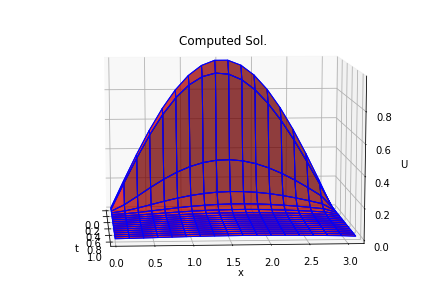

In [33]:
# Create a figure and a 3D Axes
plt.clf() # clear existing figures
T, X = meshgrid(t, x)
fig = plt.figure()
ax = Axes3D(fig)
# init function initializes the data
def init():
    # Plot the surface.
    ax.plot_surface(T, X, Z, color='red',alpha = 0.5,
                    linewidth=1, edgecolors='blue')
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('U');
    ax.set_xlim(( 0, 1.1))
    ax.set_ylim(( 0, pi))
    ax.set_zlim((0, max(abs(u0))))
    ax.set_title('Computed Sol.');
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit = False) 
# The blit parameter ensures that only those pieces of the plot are re-drawn which have been changed
# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

In [32]:
# animate over some set of x, U
x_values = x
u_values = Z[:,0:1]
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()

ax.set_xlim(( 0, pi))
ax.set_ylim((0, max(abs(u0))))
ax.set_xlabel('x')
ax.set_ylabel('U')
frame1, = ax.plot([], [], color= 'red', linewidth=2.0, linestyle='-')
frame2, = ax.plot([], [], color= 'blue', linewidth=2.0, linestyle='-')

# initialization function: plot the background of each frame
def init():
    frame1.set_data(x_values, u_values)      
    return (frame1,)

# animation function. This is called sequentially  
def animate(i):
    frame2.set_data(x_values, Z[:,i:i+1])
    ax.set_title('Time-level = t'+str([i]))
    return (frame2,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=len(t), interval=100, blit=True)

#Output the animation
rc('animation', html='jshtml')
anim






## Thank You For Reading :)